In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [456]:
data=pd.read_excel("TemperatureForecasting.xlsx")
data.head()

,Slno,datetime,conditions,winddir,visibility,temp,windspeed,pressure,humidity,dewpoint,time,date
0,1,2006-01-01T21:00:00Z,overcast,ssw,NaN,60,13.8,30.02,62,50,21:00:00,2006-01-01
1,2,2006-01-01T18:00:00Z,unknown precipitation,ssw,NaN,60,12.7,29.95,76,54,18:00:00,2006-01-01
2,3,2006-01-01T15:00:00Z,unknown precipitation,sw,3.0,61,19.6,29.90,91,59,15:00:00,2006-01-01
3,4,2006-01-01T12:00:00Z,NaN,west,NaN,78,16.1,29.76,49,62,12:00:00,2006-01-01
4,5,2006-01-01T09:00:00Z,NaN,nw,NaN,78,4.6,29.68,43,59,09:00:00,2006-01-01


In [457]:
#to check null values
data.isnull().sum()

Slno              0
datetime          0
conditions    25795
winddir           0
visibility    33140
temp              0
windspeed      1871
pressure        361
humidity          0
dewpoint          0
time              0
date              0
dtype: int64

In [458]:
#storing timestamp seperately for later use
new_df=pd.DataFrame(data.iloc[:,1])
new_df.head()

,datetime
0,2006-01-01T21:00:00Z
1,2006-01-01T18:00:00Z
2,2006-01-01T15:00:00Z
3,2006-01-01T12:00:00Z
4,2006-01-01T09:00:00Z


In [459]:
#dropping columns with null values
data.drop(['Slno'],axis=1, inplace=True)
data.drop(['visibility'],axis=1, inplace=True)
data.drop(['conditions'],axis=1, inplace=True)
data.drop(['datetime'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['time'],axis=1,inplace=True)

In [460]:
data.isnull().sum()

winddir         0
temp            0
windspeed    1871
pressure      361
humidity        0
dewpoint        0
dtype: int64

In [461]:
#imputing null values with mean
from sklearn.preprocessing import Imputer
imputer=Imputer()
data.iloc[:,3:4] = imputer.fit_transform(data.iloc[:,3:4])
data.iloc[:,2:3] = imputer.fit_transform(data.iloc[:,2:3])

/home/learnitude/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [462]:
#all null values removed 
data.isnull().sum()

winddir      0
temp         0
windspeed    0
pressure     0
humidity     0
dewpoint     0
dtype: int64

In [463]:
#Label Encoding for categorical data winddir
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data.iloc[:,[0]]=label_encoder.fit_transform(data.iloc[:,[0]])
data.head()

,winddir,temp,windspeed,pressure,humidity,dewpoint
0,12,60,13.8,30.02,62,50
1,12,60,12.7,29.95,76,54
2,13,61,19.6,29.90,91,59
3,14,78,16.1,29.76,49,62
4,8,78,4.6,29.68,43,59


In [464]:
#OneHotEncoder for winddir
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0],sparse=False)
data=ohe.fit_transform(data)
data

/home/learnitude/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0.  ,  0.  ,  0.  , ..., 30.02, 62.  , 50.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.95, 76.  , 54.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.9 , 91.  , 59.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 29.85, 55.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 49.  , 43.  ],
       [ 0.  ,  0.  ,  0.  , ..., 29.88, 47.  , 44.  ]])

In [465]:
#clean data
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0


In [466]:
#concatenating clean data with timestamp stored in new_df
data=pd.concat([data, new_df], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,datetime
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01T21:00:00Z
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01T18:00:00Z
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01T15:00:00Z
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01T12:00:00Z
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01T09:00:00Z


In [467]:
#renaming column names according to their specific characteristics
data.rename(columns={17:'temp',18:'windspeed',19:'pressure',20:'humidity',21:'dewpoint'}, inplace=True)

In [468]:
#converting datetime column to timetsamp format
data.iloc[:,22]=pd.to_datetime(data.iloc[:,22])

In [469]:
#setting index to timestamp
data.index = data.datetime
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,temp,windspeed,pressure,humidity,dewpoint,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,13.8,30.02,62.0,50.0,2006-01-01 21:00:00
2006-01-01 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,60.0,12.7,29.95,76.0,54.0,2006-01-01 18:00:00
2006-01-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,19.6,29.90,91.0,59.0,2006-01-01 15:00:00
2006-01-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,78.0,16.1,29.76,49.0,62.0,2006-01-01 12:00:00
2006-01-01 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,78.0,4.6,29.68,43.0,59.0,2006-01-01 09:00:00


In [470]:
#resampling according to days and taking the mean values
data = data.resample('D').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4068 entries, 2006-01-01 to 2017-02-19
Freq: D
Data columns (total 22 columns):
0            3684 non-null float64
1            3684 non-null float64
2            3684 non-null float64
3            3684 non-null float64
4            3684 non-null float64
5            3684 non-null float64
6            3684 non-null float64
7            3684 non-null float64
8            3684 non-null float64
9            3684 non-null float64
10           3684 non-null float64
11           3684 non-null float64
12           3684 non-null float64
13           3684 non-null float64
14           3684 non-null float64
15           3684 non-null float64
16           3684 non-null float64
temp         3684 non-null float64
windspeed    3684 non-null float64
pressure     3684 non-null float64
humidity     3684 non-null float64
dewpoint     3684 non-null float64
dtypes: float64(22)
memory usage: 731.0 KB


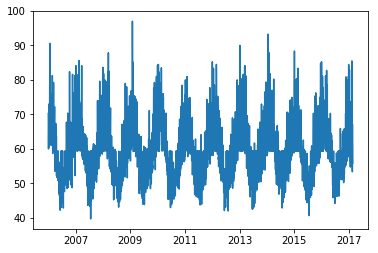

In [471]:
#imputing all the missing values after resampling the data
data.iloc[:,:] = imputer.fit_transform(data.iloc[:,:])

plt.plot(data.temp)

plt.figure(figsize=(20,20))
plt.plot(data.iloc[:,17])
plt.xlabel('date')
plt.ylabel('temp')
plt.title('Seasonal change')


In [472]:
#checking for stationarity using coint_johansen
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [473]:
#dropping data as it takes only 12 columns, omitting winddir
johan_test_temp=data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],  axis=1)
johan_test_temp.head()

,temp,windspeed,pressure,humidity,dewpoint
datetime,,,,,
2006-01-01,70.250,11.127473,29.76375,59.125,57.375
2006-01-02,62.375,9.512500,30.00375,49.875,48.000
2006-01-03,62.250,13.387500,30.00250,52.500,48.500
2006-01-04,60.000,12.375000,30.06375,43.375,43.500
2006-01-05,62.000,9.675000,29.99625,49.125,46.875


In [474]:
#computing eigen values using coint_johansen
coint_johansen(johan_test_temp,-1,1).eig

array([3.04793212e-01, 2.59593233e-01, 1.87925242e-01, 6.56924266e-02,
       5.31282846e-06])

we see that the eigen values are quite less that 1 which implies that the series is stationary, thus no transformations have been carried out

In [475]:
#dividing the dataset into train and test
new_data=data.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],  axis=1)
train=pd.DataFrame(new_data.iloc[0:3600,:])
test=pd.DataFrame(new_data.iloc[3600:,:])

In [476]:
#importing adn fitting the VAR model onto the train dataset
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()


In [477]:
#predicting values
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [478]:
#converting the predictions to DataFrame and setting column names
cols = test.columns
prediction=pd.DataFrame(prediction,index=test.index,columns=[cols])

prediction.head()

,temp,windspeed,pressure,humidity,dewpoint
datetime,,,,,
2015-11-10,59.315344,10.691339,30.034593,62.651125,48.472069
2015-11-11,59.269772,10.684304,30.036050,62.686896,48.440714
2015-11-12,59.236681,10.677779,30.037143,62.710995,48.417281
2015-11-13,59.213273,10.672704,30.037942,62.727220,48.400230
2015-11-14,59.196888,10.668965,30.038520,62.738223,48.388054


In [479]:
test.head()

,temp,windspeed,pressure,humidity,dewpoint
datetime,,,,,
2015-11-10,58.0625,9.43125,30.097500,75.7500,52.1875
2015-11-11,57.7500,7.93750,30.106875,69.3125,50.3125
2015-11-12,61.0625,7.78750,29.980625,75.9375,55.0625
2015-11-13,59.7500,13.25625,30.025625,66.3125,51.0000
2015-11-14,58.5625,11.88750,30.076250,59.6250,48.1875


In [480]:
#calculating RMSE values:
for i in range(0,5):
    print('rmse value for', cols[i], 'is : ', np.sqrt(sum((prediction.iloc[:,i]-test.iloc[:,i])**2)/len(prediction)))
    



('rmse value for', 'temp', 'is : ', 8.191546993979284)
('rmse value for', 'windspeed', 'is : ', 3.379310299081788)
('rmse value for', 'pressure', 'is : ', 0.21227224722866753)
('rmse value for', 'humidity', 'is : ', 11.760670575136592)
('rmse value for', 'dewpoint', 'is : ', 6.071200223411155)
